## todo

- how to get at results
- add cm
- add xgboost to custom.json
= add cleaning
- add scaling
- add PCA , t-SNE
- add cluster statixtics
- add cluster ploting
- add other datasets


In [1]:
%load_ext autoreload
%autoreload 2
packages = !conda list
print('Number of packages:{}'.format(len(packages)))
packages

Number of packages:196


['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'astroid                   2.4.1                    pypi_0    pypi',
 'astunparse                1.6.3                    pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     19.3.0                     py_0    conda-forge',
 'backcall                  0.1.0                      py_0    conda-forge',
 'bleach                    3.1.4              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1    conda-forge',
 'brotlipy                  0.7.0           py37h8f50634_1000    conda-forge',
 'ca-certificates           2020.4.5.1     

In [2]:
from sklearn.utils.fixes import MaskedArray

In [3]:
!jupyter nbextension list

Known nbextensions:
  config dir: /home/jovyan/.jupyter/nbconfig
    notebook section
      nbextensions_configurator/config_menu/main  enabled 
      - Validating: problems found:
        - require?  X nbextensions_configurator/config_menu/main
      contrib_nbextensions_help_item/main  enabled 
      - Validating: OK
      jupyter-js-widgets/extension  enabled 
      - Validating: problems found:
        - require?  X jupyter-js-widgets/extension
      jupyter-notebook-gist/notebook-extension  enabled 
      - Validating: problems found:
        - require?  X jupyter-notebook-gist/notebook-extension
      autosavetime/main  enabled 
      - Validating: OK
      codefolding/main  enabled 
      - Validating: OK
      code_font_size/code_font_size  enabled 
      - Validating: OK
      code_prettify/code_prettify  enabled 
      - Validating: OK
      collapsible_headings/main  enabled 
      - Validating: OK
      comment-uncomment/main  enabled 
      - Validating: OK
      equation-

## Output registry

In [4]:
from __future__ import print_function
import sys, os

old__file__ = !pwd
__file__ = !cd ../../photon ;pwd
#__file__ = !pwd
__file__ = __file__[0]
__file__
sys.path.append(__file__)
print(sys.path)
os.chdir(__file__)
!pwd

['/docker/photon/photonai', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/docker/photon']
/docker/photon


In [5]:
!pwd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np



from photonai.base import Hyperpipe, PipelineElement, Preprocessing, OutputSettings
from photonai.optimization import FloatRange, Categorical, IntegerRange
from photonai.base.photon_elements import PhotonRegistry
#from photonai.base.registry.registry import PhotonRegistry

/docker/photon


In [6]:
#import pixiedust


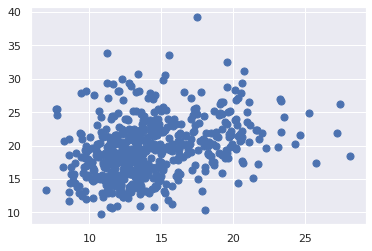

In [7]:
from sklearn.datasets import load_breast_cancer

# WE USE THE BREAST CANCER SET FROM SKLEARN
X, y = load_breast_cancer(True)
plt.scatter(X[:, 0], X[:, 1], s=50);

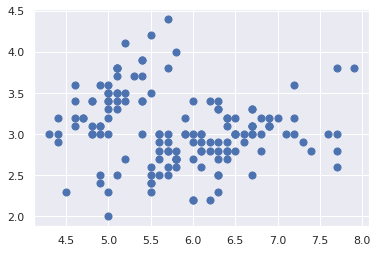

In [8]:
from sklearn.datasets import load_iris
X, y = load_iris(True)
plt.scatter(X[:, 0], X[:, 1], s=50);

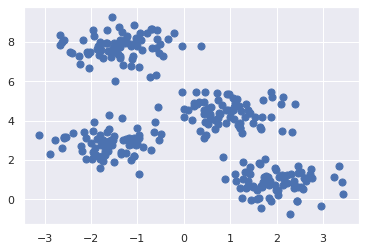

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [10]:
__file__ = "exp1.log"
base_folder = os.path.dirname(os.path.abspath(''))
custom_elements_folder = os.path.join(base_folder, 'custom_elements')
custom_elements_folder

'/docker/custom_elements'

In [11]:
registry = PhotonRegistry(custom_elements_folder=custom_elements_folder)
registry.activate()
registry.PHOTON_REGISTRIES,PhotonRegistry.PHOTON_REGISTRIES

(['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'],
 ['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'])

In [12]:
dir(PhotonRegistry)

['EMD_OUT_OF_BOUNDS',
 'EM_PKG_ID',
 'EM_SK_TYPE_ID',
 'PHOTON_REGISTRIES',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_custom_folder',
 '_check_duplicate',
 '_get_package_info',
 '_load_custom_folder',
 '_load_json',
 '_run_tests',
 '_write2json',
 'activate',
 'base_PHOTON_REGISTRIES',
 'custom_elements',
 'custom_elements_file',
 'custom_elements_folder',
 'delete',
 'elements',
 'get_element_metadata',
 'get_package_info',
 'info',
 'list_available_elements',
 'load_json',
 'register',
 'reset']

In [13]:
registry.activate()
registry.list_available_elements()



PhotonCore
ARDRegression                       sklearn.linear_model.ARDRegression                                          Estimator
AdaBoostClassifier                  sklearn.ensemble.AdaBoostClassifier                                         Estimator
AdaBoostRegressor                   sklearn.ensemble.AdaBoostRegressor                                          Estimator
BaggingClassifier                   sklearn.ensemble.BaggingClassifier                                          Estimator
BaggingRegressor                    sklearn.ensemble.BaggingRegressor                                           Estimator
BayesianGaussianMixture             sklearn.mixture.BayesianGaussianMixture                                     Estimator
BayesianRidge                       sklearn.linear_model.BayesianRidge                                          Estimator
BernoulliNB                         sklearn.naive_bayes.BernoulliNB                                             Estimator
BernoulliRBM

## KMedoids

In [14]:
registry.info("KMedoids")

----------------------------------
Name: KMedoids
Namespace: sklearn_extra.cluster
----------------------------------
Possible Hyperparameters as derived from constructor:
n_clusters                          n_clusters=8                                                               
metric                              metric='euclidean'                                                         
init                                init='heuristic'                                                           
max_iter                            max_iter=300                                                               
random_state                        random_state=None                                                          
----------------------------------


('KMedoids',
 'sklearn_extra.cluster',
 {'n_clusters': 'n_clusters',
  'metric': 'metric',
  'init': 'init',
  'max_iter': 'max_iter',
  'random_state': 'random_state'})

***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************

***************************************************************************************************************
Outer Cross validation Fold 1
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.6113      |      0.1433      |
|   MI   |       0.5088      |      0.2901      |
|  HCV   |       0.5137      |      0.3132      |
|   FM   |       0.8451      |      0.5966      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 2
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.5332      |      0.3779      |
|   MI   |       0.4726      |      0.3576      |
|  HCV   |       0.4708      |      0.3723      |
|   FM   |       0.8049      |      0.7157      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 3
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.4503      |      0.6713      |
|   MI   |       0.4313      |      0.6163      |
|  HCV   |       0.3888      |      0.5849      |
|   FM   |       0.7760      |      0.8610      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 4
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.4709      |      0.7271      |
|   MI   |       0.4328      |      0.6100      |
|  HCV   |       0.4410      |      0.6170      |
|   FM   |       0.7640      |      0.9043      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 5
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.5147      |      0.6797      |
|   MI   |       0.4630      |      0.4966      |
|  HCV   |       0.5018      |      0.5406      |
|   FM   |       0.7716      |      0.8895      |
+--------+-------------------+------------------+

OVERALL BEST CONFIGURATION
{
    "KMeans": [
        "n_clusters=3"
    ]
}


/docker/photon/photonai/processing/results_handler.py:699: RuntimeWarning: invalid value encountered in double_scalars
  if pct / total >= 1:


Custom pipeline element must implement .save() method or allow pickle.
name 'PhotonaiNotImplementedError' is not defined
Traceback (most recent call last):
  File "/docker/photon/photonai/base/hyperpipe.py", line 1606, in save_elements
    joblib.dump(
NameError: name 'joblib' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/docker/photon/photonai/base/hyperpipe.py", line 1205, in fit
    self._finalize_optimization()
  File "/docker/photon/photonai/base/hyperpipe.py", line 875, in _finalize_optimization
    self.optimum_pipe, pretrained_model_filename
  File "/docker/photon/photonai/base/hyperpipe.py", line 1643, in save_optimum_pipe
    [val[1] for val in optimum_pipe.elements], folder
  File "/docker/photon/photonai/base/hyperpipe.py", line 1612, in save_elements
    "Custom pipeline element must implement .save() method or "
  File "/docker/photon/photonai/errors.py", line 48, in raise_PhotonaiNotImplem

Traceback (most recent call last):
  File "/docker/photon/photonai/base/hyperpipe.py", line 1606, in save_elements
    joblib.dump(
NameError: name 'joblib' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/docker/photon/photonai/base/hyperpipe.py", line 1205, in fit
    self._finalize_optimization()
  File "/docker/photon/photonai/base/hyperpipe.py", line 875, in _finalize_optimization
    self.optimum_pipe, pretrained_model_filename
  File "/docker/photon/photonai/base/hyperpipe.py", line 1643, in save_optimum_pipe
    [val[1] for val in optimum_pipe.elements], folder
  File "/docker/photon/photonai/base/hyperpipe.py", line 1612, in save_elements
    "Custom pipeline element must implement .save() method or "
  File "/docker/photon/photonai/errors.py", line 48, in raise_PhotonaiNotImplementedError
    raise PhotonaiNotImplementedError(msg)
NameError: name 'PhotonaiNotImplementedError' is not defined


NameError: name 'PhotonaiNotImplementedError' is not defined

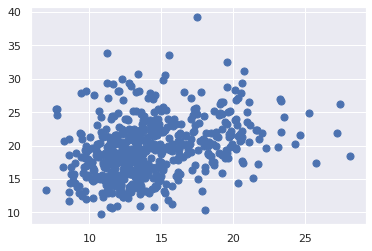

In [18]:
#import pixiedust
#%%pixie_debugger

"""
Example script for kmeans hopt
"""
from sklearn.datasets import make_moons, load_iris, make_blobs, load_breast_cancer
#X, y = make_moons(200, noise=.05, random_state=0)
#X, y = load_iris(True)
#X, y = load_iris(True)
X, y = load_breast_cancer(True)


plt.scatter(X[:, 0], X[:, 1], s=50);
# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')

my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['ARI', 'MI', 'HCV', 'FM'],
                    best_config_metric='ARI',
                    outer_cv=KFold(n_splits=5),
                    inner_cv=KFold(n_splits=10),
                    verbosity=0,
                    output_settings=settings)


my_pipe += PipelineElement('KMeans', hyperparameters={
                                                    'n_clusters': IntegerRange(2, 8),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True



## RF

In [15]:
registry.info("RandomForestClassifier")

----------------------------------
Name: RandomForestClassifier
Namespace: sklearn.ensemble
----------------------------------
Possible Hyperparameters as derived from constructor:
n_estimators                        n_estimators=100                                                           
criterion                           criterion='gini'                                                           
max_depth                           max_depth=None                                                             
min_samples_split                   min_samples_split=2                                                        
min_samples_leaf                    min_samples_leaf=1                                                         
min_weight_fraction_leaf            min_weight_fraction_leaf=0.0                                               
max_features                        max_features='auto'                                                        
max_leaf_nodes                     

('RandomForestClassifier',
 'sklearn.ensemble',
 {'n_estimators': 'n_estimators',
  'criterion': 'criterion',
  'max_depth': 'max_depth',
  'min_samples_split': 'min_samples_split',
  'min_samples_leaf': 'min_samples_leaf',
  'min_weight_fraction_leaf': 'min_weight_fraction_leaf',
  'max_features': 'max_features',
  'max_leaf_nodes': 'max_leaf_nodes',
  'min_impurity_decrease': 'min_impurity_decrease',
  'min_impurity_split': 'min_impurity_split',
  'bootstrap': 'bootstrap',
  'oob_score': 'oob_score',
  'n_jobs': 'n_jobs',
  'random_state': 'random_state',
  'verbose': 'verbose',
  'warm_start': 'warm_start',
  'class_weight': 'class_weight',
  'ccp_alpha': 'ccp_alpha',
  'max_samples': 'max_samples'})

In [16]:
"""
Example script for RF hopt
"""

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import KFold

from photonai.base import Hyperpipe, PipelineElement, Preprocessing, OutputSettings
from photonai.optimization import FloatRange, Categorical, IntegerRange

# WE USE THE BREAST CANCER SET FROM SKLEARN
#X, y = load_breast_cancer(True)
X, y = load_iris(True)

# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')
my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['accuracy', 'precision', 'recall', 'balanced_accuracy'],
                    # forced to 0th element in metrics
                    best_config_metric='accuracy',
                    outer_cv=KFold(n_splits=2),
                    inner_cv=KFold(n_splits=2),
                    verbosity=1,
                    output_settings=settings)


my_pipe += PipelineElement('RandomForestClassifier', hyperparameters={
                                                    'n_estimators': IntegerRange(2, 1999),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True




15/05/2020-00:11:09 | Output Folder: ./tmp/batching_results_2020-05-15_00-11-09
***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************
15/05/2020-00:11:09 | Preparing data and PHOTON objects for analysis...
15/05/2020-00:11:09 | Checking input data...
15/05/2020-00:11:09 | Running analysis with 150 samples.

***************************************************************************************************************
Outer Cross validation Fold 1
***************************************************************************************************************
15/05/2020-00:11:09 | Preparing data for outer fold 1...
15/05/2020-00:11:09 | Running Dummy Estimator...
Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
15/05/20

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:12 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:14 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:15 | Computed configuration 1/20 in 0:00:05.320892
15/05/2020-00:11:15 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:15 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1353"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:18 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:22 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:23 | Computed configuration 2/20 in 0:00:08.462317
15/05/2020-00:11:23 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:23 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1260"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:27 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:30 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:31 | Computed configuration 3/20 in 0:00:07.787430
15/05/2020-00:11:31 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:31 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=152"
    ]
}
15/05/2020-00:11:31 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:32 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.
15/05/2020-00:11:32 | Computed configuration 4/20 in 0:00:01.018582
15/05/2020-00:11:32 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:32 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1903"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:37 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:42 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:44 | Computed configuration 5/20 in 0:00:11.734649
15/05/2020-00:11:44 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:44 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=16"
    ]
}
15/05/2020-00:11:44 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.
15/05/2020-00:11:44 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.
15/05/2020-00:11:44 | Computed configuration 6/20 in 0:00:00.163050
15/05/2020-00:11:44 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:44 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
------------------------------------------------------------------------------------------

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being se

15/05/2020-00:11:48 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:51 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:53 | Computed configuration 7/20 in 0:00:08.820809
15/05/2020-00:11:53 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:53 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=957"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:55 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:58 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:11:59 | Computed configuration 8/20 in 0:00:06.023857
15/05/2020-00:11:59 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:11:59 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1671"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:03 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:08 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:09 | Computed configuration 9/20 in 0:00:10.450278
15/05/2020-00:12:09 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:09 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1830"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:14 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:19 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:21 | Computed configuration 10/20 in 0:00:11.427959
15/05/2020-00:12:21 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:21 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=49"
    ]
}
15/05/2020-00:12:21 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.
15/05/2020-00:12:21 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being se

15/05/2020-00:12:21 | Computed configuration 11/20 in 0:00:00.369618
15/05/2020-00:12:21 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:21 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=566"
    ]
}
15/05/2020-00:12:23 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:25 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:25 | Computed configuration 12/20 in 0:00:03.514322
15/05/2020-00:12:25 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:25 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1209"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:29 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:32 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:33 | Computed configuration 13/20 in 0:00:07.574425
15/05/2020-00:12:33 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:33 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=542"
    ]
}
15/05/2020-00:12:35 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:37 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:37 | Computed configuration 14/20 in 0:00:03.394422
15/05/2020-00:12:37 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:37 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=514"
    ]
}
15/05/2020-00:12:39 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:40 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:41 | Computed configuration 15/20 in 0:00:03.238765
15/05/2020-00:12:41 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:41 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1000"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:44 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:47 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:48 | Computed configuration 16/20 in 0:00:06.170659
15/05/2020-00:12:48 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:48 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1112"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:51 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:54 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:55 | Computed configuration 17/20 in 0:00:06.924948
15/05/2020-00:12:55 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:12:55 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=984"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:12:58 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:13:01 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:13:02 | Computed configuration 18/20 in 0:00:06.153200
15/05/2020-00:13:02 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:13:02 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=1210"
    ]
}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:13:05 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:13:08 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:13:10 | Computed configuration 19/20 in 0:00:07.558859
15/05/2020-00:13:10 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:13:10 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=109"
    ]
}
15/05/2020-00:13:10 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/05/2020-00:13:11 | Specificity (metric) is valid only for binary classification problems. You have 1 classes.
15/05/2020-00:13:11 | Computed configuration 20/20 in 0:00:00.749921
15/05/2020-00:13:11 | Performance:             accuracy - Train: 1.0000, Validation: 0.6170
15/05/2020-00:13:11 | Best Performance So Far: accuracy - Train: 1.0000, Validation: 0.6170


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------------------------------------------------------------------------------------------------
15/05/2020-00:13:11 | Hyperparameter Optimization finished. Now finding best configuration .... 
15/05/2020-00:13:11 | Number of tested configurations: 20
---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "RandomForestClassifier": [
        "n_estimators=850"
    ]
}
15/05/2020-00:13:13 | Calculating best model performance on test set...
Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
Traceback (most recent call last):
  File "/docker/photon/photonai/base/hyperpipe.py", line 1192, in fit
    self.data.X, self.data.y, **self.data.kwargs
  File "/docker/photon/photonai/processing/outer_folds.py", line 358, in f

Traceback (most recent call last):
  File "/docker/photon/photonai/base/hyperpipe.py", line 1192, in fit
    self.data.X, self.data.y, **self.data.kwargs
  File "/docker/photon/photonai/processing/outer_folds.py", line 358, in fit
    **self._test_kwargs
  File "/docker/photon/photonai/processing/inner_folds.py", line 421, in score
    y_true, y_pred, non_default_score_metrics
  File "/docker/photon/photonai/processing/metrics.py", line 412, in calculate_metrics
    output_metrics[metric] = Scorer.create(metric)(y_true, y_pred)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1668, in precision_score
    zero_division=zero_division)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1480, in precision_recall_fscore_support
    pos_label)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1312, in _check_set_wise_labels
    % (y_type, average_options))
ValueError: Target i

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Show kmeans

In [ ]:
registry.info("KMeans")

In [ ]:
#import pixiedust
#%%pixie_debugger

"""
Example script for kmeans hopt
"""

X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')

my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['ARI', 'MI', 'HCV', 'FM'],
                    best_config_metric='ARI',
                    outer_cv=KFold(n_splits=5),
                    inner_cv=KFold(n_splits=10),
                    verbosity=0,
                    output_settings=settings)


my_pipe += PipelineElement('KMeans', hyperparameters={
                                                    'n_clusters': IntegerRange(2, 8),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True




## LOCAL SCAPPY

In [ ]:
#import pixiedust
#%%pixie_debugger

"""
Example script for kmeans hopt
"""
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')

my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['ARI', 'MI', 'HCV', 'FM'],
                    best_config_metric='ARI',
                    outer_cv=KFold(n_splits=5),
                    inner_cv=KFold(n_splits=10),
                    verbosity=0,
                    output_settings=settings)


my_pipe += PipelineElement('KMeans', hyperparameters={
                                                    'n_clusters': IntegerRange(2, 8),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True



